In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import data_processing_utils


from sklearn.decomposition import PCA

In [17]:
# Import data

data = pd.read_csv("communities.data", header=None)

# Initial data shape
print(f"Dataset shape: {data.shape}")

# Drop categorical columns
data.drop([0, 1, 2, 3], axis="columns", inplace=True)

# Replace na values and drop non-numerical columns
data_processing_utils.remove_and_fill_non_numerical(data)

X = data.drop(data.columns[-1], axis="columns")
y = data[data.columns[-1]]

print(f"Data shape after column removal and filling: {data.shape}")

Dataset shape: (1994, 128)
Data shape after column removal and filling: (1994, 124)


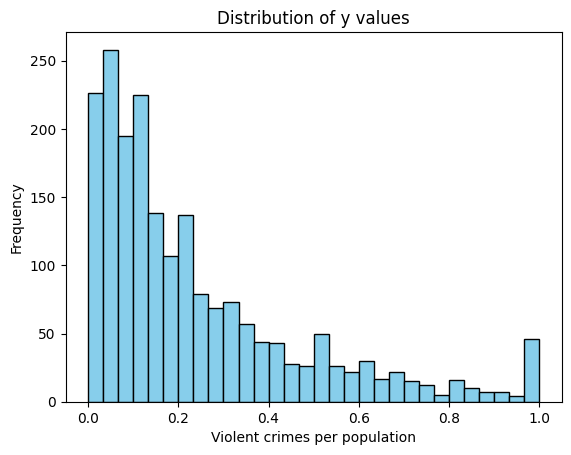

In [14]:
# Histogram of y values
plt.hist(y, bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Violent crimes per population')
plt.ylabel('Frequency')
plt.title('Distribution of y values')

plt.show()

[0.66578862 0.75210905 0.81286575 0.83952443 0.86247636 0.87742022
 0.89040743 0.9009538  0.90996938 0.91712232 0.92329343 0.92790734
 0.93239731 0.93672622 0.94059688 0.94423136 0.94740342 0.95008321
 0.95249697 0.95477829 0.95697184 0.95906167 0.96109658 0.96305421
 0.96493235 0.96673679 0.96833761 0.96986672 0.97128588 0.97268771
 0.97396324 0.97523219 0.97642218 0.97757126 0.97867808 0.97974071
 0.98076488 0.9817073  0.98257164 0.98341986 0.98425507 0.98501531
 0.98575236 0.9864584  0.98714196 0.98780285 0.98844507 0.98903651
 0.9896272  0.99016973 0.99067136 0.99116614 0.99163187 0.99208741
 0.99251406 0.9928938  0.99325611 0.99361381 0.99395062 0.99426218
 0.99457155 0.9948684  0.99515456 0.99543044 0.9956858  0.99592846
 0.99616038 0.99638212 0.99659046 0.99679049 0.99698057 0.99715844
 0.99733472 0.99749256 0.99764636 0.99778794 0.99792585 0.99805849
 0.99818117 0.99829851 0.99841427 0.99852704 0.99863247 0.99872949
 0.99882064 0.99890737 0.99899211 0.99907574 0.99915441 0.9992

<BarContainer object of 123 artists>

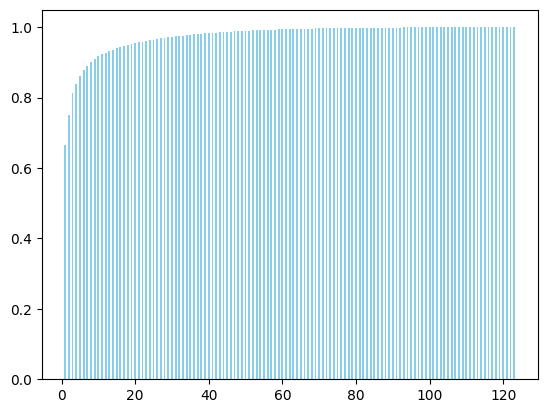

In [16]:
# Explained variance
pca = PCA()
pca.fit(X)
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_cumsum)

# Create a bar plot of the cumulative explained variance
plt.bar(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, color='skyblue', width=0.5)

In [10]:
print(f"Standard deviation: {y.var()}")

Standard deviation: 0.05428196443318918


In [68]:
# Show search results

result_paths = ["search_results.pickle", "search_results_old.pickle"]

for path in result_paths:
    with open(path, "rb") as file:
        results = pickle.load(file)
        for k, v in results.items():
            print(f"{k} best score: ".ljust(50), -v.best_score_)

        print()
        for k, v in results.items():
            print(f"{k} best params: ".ljust(50), v.best_params_)
    print()
    print()


mlp_regressor_search best score:                   0.01842530478359673
linear_regression_search best score:               0.01886820748823999
lasso_search best score:                           0.01869747480094494
ridge_search best score:                           0.01844839321171262
decision_tree_regressor_search best score:         0.023216762729188486
random_forest_regressor_search best score:         0.018276252877797123
extra_trees_regressor_search best score:           0.017854473708863623
gradient_boosting_regressor_search best score:     0.018337906572774683

mlp_regressor_search best params:                  {'activation': 'tanh', 'hidden_layer_sizes': (400, 200, 100, 50, 25), 'max_iter': 50, 'solver': 'adam'}
linear_regression_search best params:              {}
lasso_search best params:                          {}
ridge_search best params:                          {}
decision_tree_regressor_search best params:        {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 0